In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,SimpleRNN,GRU,LSTM,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
series = np.sin((0.1*np.arange(400))**2)

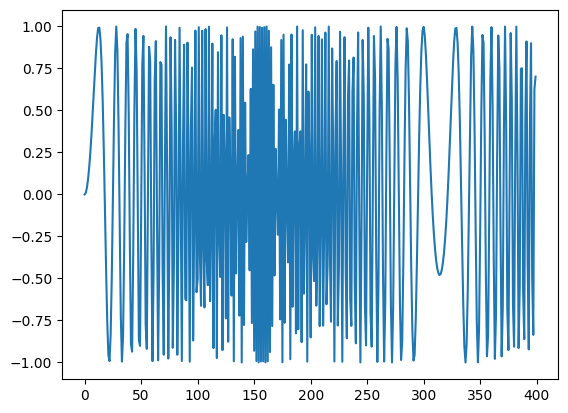

In [5]:
plt.plot(series)
plt.show()

In [6]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (390, 10) Y.shape (390,)


In [8]:
#autoregressive linear model
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01),
)
r=model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N // 2:], Y[-N // 2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 25ms/step - loss: 1.7618 - val_loss: 1.0108
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 1.5173 - val_loss: 0.9176
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 1.3320 - val_loss: 0.8418
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 1.1554 - val_loss: 0.7968
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 1.0172 - val_loss: 0.7538
Epoch 6/80
7/7 [==============================] - 0s 7ms/step - loss: 0.9129 - val_loss: 0.7096
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 0.8228 - val_loss: 0.6900
Epoch 8/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7500 - val_loss: 0.6628
Epoch 9/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6921 - val_loss: 0.6285
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6454 - val_loss: 0.5984
Epoch 11/80
7/7 [=====================

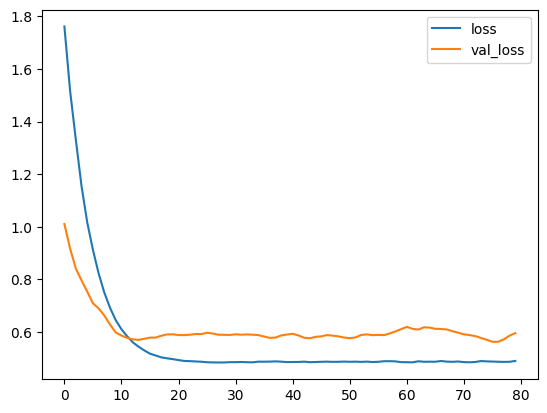

In [10]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

13/13 [==============================] - 0s 1ms/step
(390, 1)


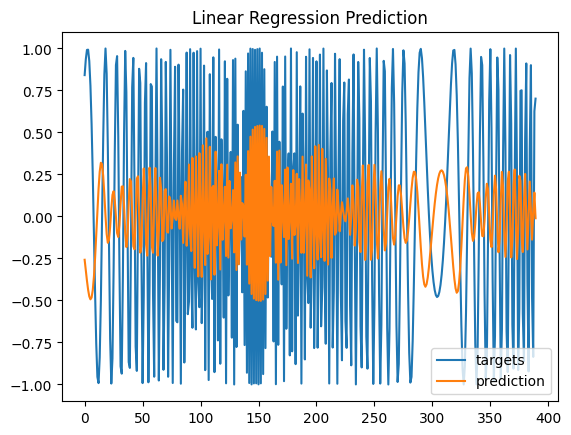

In [12]:
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]
plt.plot(Y,label='targets')
plt.plot(predictions,label='prediction')
plt.title("Linear Regression Prediction")
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


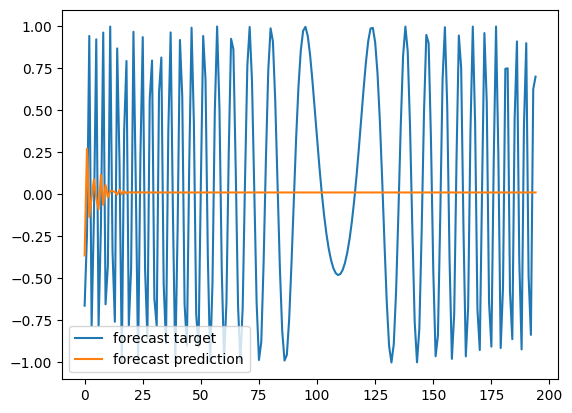

In [13]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [14]:
#rnn w lstm
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 5s 55ms/step - loss: 0.5301 - val_loss: 0.5360
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4976 - val_loss: 0.5222
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4537 - val_loss: 0.6140
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3888 - val_loss: 0.5771
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3355 - val_loss: 0.5334
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2647 - val_loss: 0.4785
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2459 - val_loss: 0.3928
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1958 - val_loss: 0.2553
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1488 - val_loss: 0.2338
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0878 - val_loss: 0.1898
Epoch 11/200
7/7 [==========

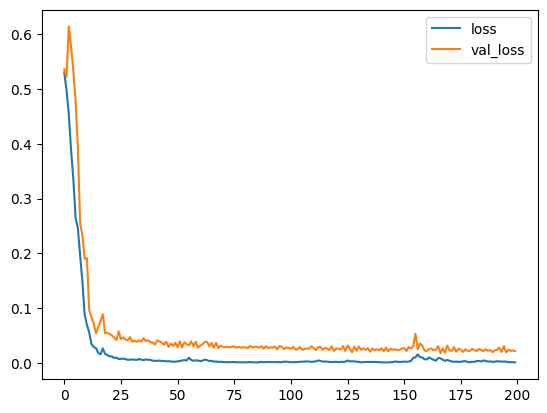

In [16]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step
(390, 1)


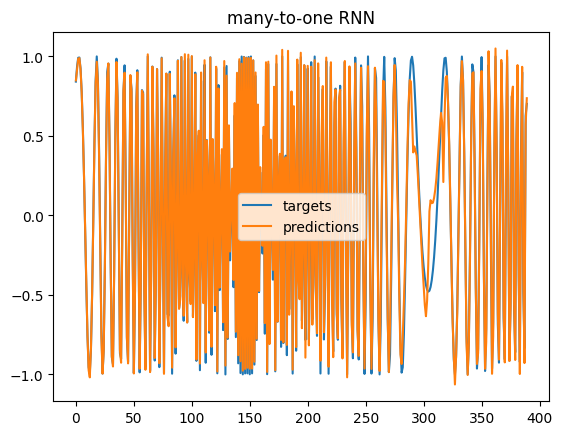

In [17]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


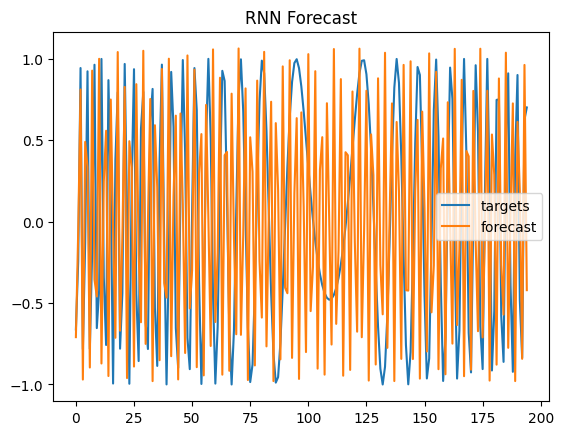

In [18]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()